See here for instructions to set up jupyter lab:
https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cymr import cmr
from cymr import network
from cymr import parameters
from psifr import fr
from cfr import task

cfr_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(cfr_dir, 'cfr_eeg_mixed.csv')
pattern_file = os.path.join(cfr_dir, 'cfr_patterns.hdf5')
model_name = 'cmr_fcf-loc-cat_ff-use'
#model_name = 'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_rec_cat=1-B_rec_use=1'
fit_dir = os.path.join(cfr_dir, 'fits', 'v4', model_name)
param_file = os.path.join(fit_dir, 'parameters.json')

In [2]:
param_def = parameters.read_json(param_file)
results = pd.read_csv(os.path.join(fit_dir, 'fit.csv'), index_col=0)
subj_param = results.loc[1].to_dict()
subj_param

{'rep': 2.0,
 'T': 0.1,
 'Lfc': 0.1421235506167124,
 'Lcf': 0.06125891777213766,
 'P1': 0.20837608864624904,
 'P2': 1.3415768771784768,
 'B_enc': 0.7265696187706245,
 'B_start': 0.8224175203042224,
 'B_rec': 0.8871479349886731,
 'X1': 0.007866708788531112,
 'X2': 0.2622093072835936,
 'w0': 0.8531656440016891,
 'Dff': 0.14191247049078282,
 'Dfc': 0.8578764493832876,
 'Dcf': 0.9387410822278623,
 'wr_loc': 0.8531656440016891,
 'wr_cat': 0.14683435599831085,
 'w_loc': 0.9855109709251202,
 'w_cat': 0.16961169236295873,
 'logl': -852.6944411624693,
 'n': 373.0,
 'k': 11.0}

In [3]:
param_def

fixed:
T: 0.1

free:
Lfc: [0, 1]
Lcf: [0, 1]
P1: [0, 10]
P2: [0.1, 5]
B_enc: [0, 1]
B_start: [0, 1]
B_rec: [0, 1]
X1: [0, 1]
X2: [0, 5]
w0: [0, 1]
Dff: [0, 10]

dependent:
Dfc: 1 - Lfc
Dcf: 1 - Lcf
wr_loc: w0
wr_cat: 1 - w0
w_loc: wr_loc / sqrt(wr_loc**2 + wr_cat**2)
w_cat: wr_cat / sqrt(wr_loc**2 + wr_cat**2)

dynamic:


sublayers:
f: ['task']
c: ['task']

weights:
fc: {(('task', 'item'), ('task', 'loc')): 'Dfc * w_loc * loc', (('task', 'item'), ('task', 'cat')): 'Dfc * w_cat * cat'}
cf: {(('task', 'item'), ('task', 'loc')): 'Dcf * w_loc * loc', (('task', 'item'), ('task', 'cat')): 'Dcf * w_cat * cat'}
ff: {('task', 'item'): 'Dff * (use)'}

sublayer_param:

In [4]:
patterns = network.load_patterns(pattern_file)
data = pd.read_csv(data_file)
list_data = fr.filter_data(data, subjects=1, lists=2)
list_data = task.set_item_index(list_data, patterns['items'])
list_data

,subject,list,position,trial_type,item,item_index,session,list_type,category,response,response_time,list_category
0,1,2,1,study,SEAN PENN,228.0,1,mixed,cel,3.0,1.255,mixed
1,1,2,2,study,AUDREY HEPBURN,19.0,1,mixed,cel,3.0,1.040,mixed
2,1,2,3,study,ST PATRICKS CATHEDRAL,463.0,1,mixed,loc,2.0,1.164,mixed
3,1,2,4,study,LES INVALIDES,364.0,1,mixed,loc,2.0,0.829,mixed
4,1,2,5,study,GREAT ZIMBABWE RUINS,340.0,1,mixed,loc,3.0,0.872,mixed
5,1,2,6,study,BRYCE CANYON,281.0,1,mixed,loc,2.0,1.241,mixed
6,1,2,7,study,TROPHY,745.0,1,mixed,obj,3.0,0.862,mixed
7,1,2,8,study,BRUSH,548.0,1,mixed,obj,3.0,0.779,mixed
8,1,2,9,study,SUPREME COURT,469.0,1,mixed,loc,2.0,1.245,mixed
9,1,2,10,study,SAN FRANCISCO,444.0,1,mixed,loc,4.0,0.854,mixed


In [5]:
model = cmr.CMR()
state = model.record(list_data, subj_param, param_def=param_def, patterns=patterns, remove_blank=True)

0.3002178594274627

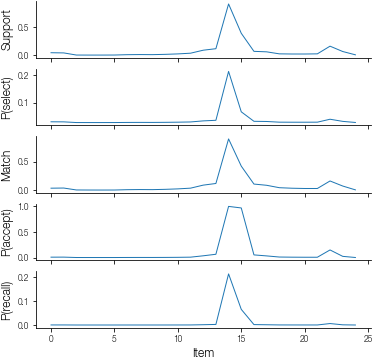

In [77]:
from scipy.special import expit
net = state[28]
T = .9
a = 20
b = -5
#net.w_cf_exp.shape
support = net.c @ (net.w_cf_exp + net.w_cf_pre).T
match = net.c @ (net.w_fc_exp + net.w_fc_pre).T
scaled = np.exp((2 * support) / T)
p_select = scaled / np.sum(scaled)
p_accept = expit(a * match + b)

fig, ax = plt.subplots(5, 1, figsize=(6, 6), sharex=True)
ax[0].plot(support)
ax[0].set_ylabel('Support')
ax[1].plot(p_select)
ax[1].set_ylabel('P(select)')
ax[2].plot(match)
ax[2].set_ylabel('Match')
ax[3].plot(p_accept)
ax[3].set_ylabel('P(accept)')
ax[4].plot(p_select * p_accept)
ax[4].set_ylabel('P(recall)')
ax[4].set_xlabel('Item')

np.sum(p_select * p_accept)

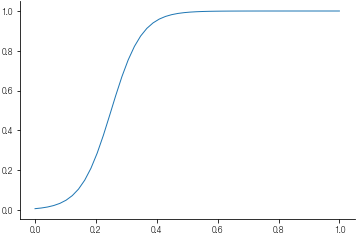

In [76]:
x = np.linspace(0, 1, 50)
plt.plot(x, expit(20 * x - 5))

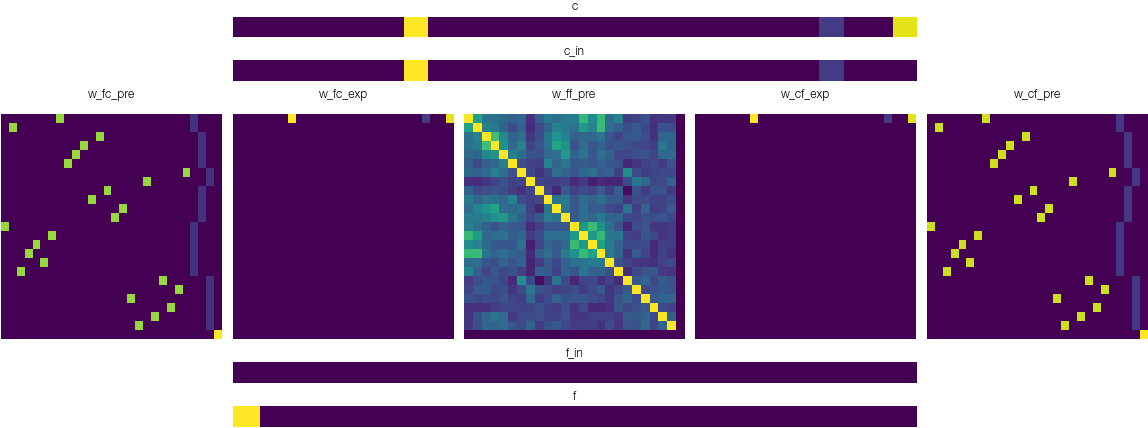

In [6]:
fig, ax = network.init_plot(figsize=(16, 6))
state[0].plot(ax=ax)

In [7]:
%matplotlib widget
from cymr import network
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

# initialize the plot
fig, ax = network.init_plot(figsize=(14, 6))
state[0].plot(ax=ax)

def update(n=1):
    """Update network data on reach time step."""
    ax['c'].images[0].set_data(state[n].c[None, :])
    ax['c_in'].images[0].set_data(state[n].c_in[None, :])
    ax['f'].images[0].set_data(state[n].f[None, :])
    f_in = state[n].f_in
    ax['f_in'].images[0].set_data(f_in[None, :])
    ax['f_in'].images[0].set_clim(np.min(f_in), np.max(f_in))
    ax['w_fc_exp'].images[0].set_data(state[n].w_fc_exp)
    ax['w_cf_exp'].images[0].set_data(state[n].w_cf_exp)

w = interactive(update, n=widgets.IntSlider(min=0, max=len(state) - 1, step=1, value=0))
display(w)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=0, description='n', max=37), Output()), _dom_classes=('widget-interact',…